# Gender Determination by Morphometry of Eyes

## Overview

The anthropometric analysis of the human face is an essential study for performing craniofacial plastic and reconstructive surgeries. Facial anthropometrics are affected by various factors such as age, gender, ethnicity, socioeconomic status, environment, and region.  

Plastic surgeons who undertake the repair and reconstruction of facial deformities find the anatomical dimensions of the facial structures useful for their surgeries. These dimensions are a result of the Physical or Facial appearance of an individual. Along with factors like culture, personality, ethnic background, age; eye appearance and symmetry contributes majorly to the facial appearance or aesthetics. 

My objective is to build a model to scan the image of an eye of a patient and find if the gender of the patient is **male** or __female__.

### Evaluation

The Model shall be evaluated using Accuracy Score.


Dataset Link: https://drive.google.com/file/d/1f7uslI-ZHidriQFZR966_aILjlkgDN76/view?usp=sharing

## Unzipping the Downloaded File

In [11]:
from zipfile import ZipFile

In [22]:
with ZipFile('eye_gender_data.zip', 'r') as zf:
    zf.extractall('')

## Loading Libraries

In [20]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading Images and Attaching the corresponding Label

In [46]:
labels = pd.read_csv("eye_gender_data/Training_set.csv")    # loading the labels

file_paths = [[fname, 'eye_gender_data/train/' + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

data = []                                                 # initialize an empty numpy array
image_size = 100                                          # image size taken is 50 here. one can take other size too
dsize = (image_size, image_size)

In [49]:

for i in range(len(train_data)):
    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)       # converting the image to gray scale
    new_img_array = cv2.resize(img_array, dsize)                                   # resizing the image array
    data.append([new_img_array, train_data['label'][i]])


## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

[array([[188, 188, 189, ..., 176, 175, 175],
       [189, 189, 188, ..., 174, 173, 172],
       [190, 189, 188, ..., 168, 167, 167],
       ...,
       [133, 137, 144, ..., 168, 167, 166],
       [134, 138, 145, ..., 165, 164, 163],
       [135, 139, 146, ..., 163, 162, 162]], dtype=uint8), 'male']


Text(0.5, 1.0, 'male')

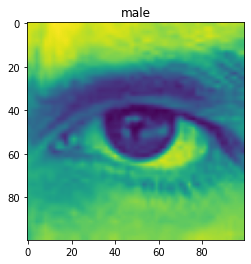

In [50]:
print(data[0])
plt.imshow(data[0][0])
plt.title(data[0][1])


In [51]:
data2 = []     # initialize an empty numpy array
image_size = 100     # image size taken is 100 here. one can take other size too
for i in range(len(train_data)):
  
  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale

  new_img_array = cv2.resize(img_array, (image_size, image_size))      # resizing the image array
  data2.append([new_img_array])


In [52]:
train_im = np.array(data2,dtype='uint8')
train_im.shape

(9220, 1, 100, 100)

In [53]:
train_im = train_im.reshape(9220,100,100,1)
print(train_im.shape)
print(train_im.dtype)

(9220, 100, 100, 1)
uint8


In [56]:
for i in range(len(data)):
  a=pd.DataFrame(data)
  a.columns= ['images','gender']
labelencoder = LabelEncoder()
a['gender_cat'] = labelencoder.fit_transform(a['gender'])
a.head()  


,images,gender,gender_cat
0,"[[188, 188, 189, 189, 190, 186, 180, 182, 185,...",male,1
1,"[[167, 169, 173, 177, 181, 179, 178, 175, 175,...",female,0
2,"[[181, 179, 177, 176, 175, 175, 175, 175, 173,...",female,0
3,"[[98, 97, 97, 97, 98, 104, 108, 110, 111, 112,...",female,0
4,"[[177, 180, 180, 173, 174, 172, 168, 171, 170,...",male,1


Text(0.5, 1.0, 'male')

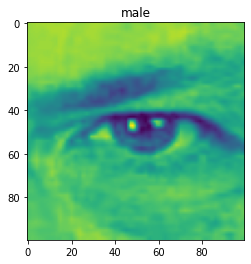

In [57]:
plt.imshow(train_im[5].reshape(100,100))
plt.title(a['gender'][5])

In [58]:
X = train_im /255
y = a['gender_cat']


## Building Model & Hyperparameter tuning
Now we are finally ready, and we can train the model.


In [59]:
# define input shape
INPUT_SHAPE = (100,100,1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16928)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4333824   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

## Validate the model


In [60]:
EPOCHS = 10

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=3,
                                               restore_best_weights=True,
                                               verbose=1)
history = model.fit(X,
                    y,
                    batch_size=5,
                    callbacks=[es_callback],
                    validation_split=0.2, 
                    epochs=EPOCHS,verbose =1)

Epoch 1/10
1476/1476 [==============================] - 390s 258ms/step - loss: 0.5111 - accuracy: 0.7509 - val_loss: 0.4242 - val_accuracy: 0.8048
Epoch 2/10
1476/1476 [==============================] - 417s 283ms/step - loss: 0.3813 - accuracy: 0.8376 - val_loss: 0.3477 - val_accuracy: 0.8520
Epoch 3/10
1476/1476 [==============================] - 373s 252ms/step - loss: 0.3240 - accuracy: 0.8651 - val_loss: 0.3357 - val_accuracy: 0.8617
Epoch 4/10
1476/1476 [==============================] - 360s 244ms/step - loss: 0.2734 - accuracy: 0.8894 - val_loss: 0.3224 - val_accuracy: 0.8720
Epoch 5/10
1476/1476 [==============================] - 348s 236ms/step - loss: 0.2456 - accuracy: 0.8966 - val_loss: 0.3533 - val_accuracy: 0.8780
Epoch 6/10
1476/1476 [==============================] - 401s 272ms/step - loss: 0.2010 - accuracy: 0.9187 - val_loss: 0.3102 - val_accuracy: 0.8758
Epoch 7/10
1476/1476 [==============================] - 366s 248ms/step - loss: 0.1632 - accuracy: 0.9344 - val_

## Predict The Output For Testing Dataset 😅
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Test.csv).

#### Load Test Set
Load the test data on which final submission is to be made.

In [61]:
test_labels = pd.read_csv("eye_gender_data/Testing_set.csv")   # loading the labels
file_paths2 = [[fname2, 'eye_gender_data/test/' + fname2] for fname2 in test_labels['filename']]
images_t = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_data = pd.merge(images_t, test_labels, how = 'inner', on = 'filename')

data_t = []     # initialize an empty numpy array
image_size = 100     # image size taken is 100 here. one can take other size too
for i in range(len(test_data)):
  
  img_array_t = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE)   # converting the image to gray scale

  new_img_array_t = cv2.resize(img_array_t, (image_size, image_size))      # resizing the image array
  data_t.append([new_img_array_t])

## Data Pre-processing on test_data


In [62]:
test_im = np.array(data_t,dtype='uint8')
test_im.shape

(2305, 1, 100, 100)

In [63]:
test_im = test_im.reshape(2305,100,100,1)

In [64]:
print(test_im.shape)
print(test_im.dtype)


(2305, 100, 100, 1)
uint8


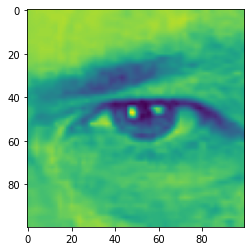

In [65]:
plt.imshow(test_im[5].reshape(100,100))

In [66]:
test_norm = test_im / 255

### Make Prediction on Test Dataset
Time to make a submission!!!

In [67]:
prediction2 = model.predict(test_norm)
prediction2[:5]

array([[0.05078512, 0.9562769 ],
       [0.9931992 , 0.00114989],
       [0.8768406 , 0.0501498 ],
       [0.9914488 , 0.0011422 ],
       [0.04644918, 0.9252399 ]], dtype=float32)

## Saving the Prediction as .CSV File

In [68]:
pred2_label = np.argmax(prediction2,axis=1)
submission_22=pd.DataFrame({'filename':test_labels['filename'], 'label_num':pred2_label})

submission_22["label"] = labelencoder.inverse_transform(submission_22['label_num'])
submission22 = submission_22[['filename','label']]                                                            
submission22.to_csv('submission3.csv', index = False)
print(submission22.head())


      filename   label
0  Image_1.jpg    male
1  Image_2.jpg  female
2  Image_3.jpg  female
3  Image_4.jpg  female
4  Image_5.jpg    male
